<a href="https://colab.research.google.com/github/minhnhat-1504/THTTNT/blob/main/BaoCao_THTTNT_Buoi05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 align="center"><font color="Green">BÁO CÁO THỰC HÀNH MÔN TRÍ TUỆ NHÂN TẠO</font></h1>**
<h3>TUẦN 5 - HỌC MÁY</h3>



**Họ và tên:** Lê Hoàng Minh Nhật <br>
**MSSV:** 2001230611



# PHẦN 1: TỔNG QUAN LÝ THUYẾT  
## CLUSTERING (K-Means) VÀ CLASSIFICATION (K-NN)



## 1.1. Kỹ thuật K-Means Clustering (Học Không Giám Sát)

**K-Means Clustering** là một thuật toán phân cụm (clustering) thuộc nhóm **Học không giám sát (Unsupervised Learning)**, được sử dụng để khám phá cấu trúc tiềm ẩn trong dữ liệu **chưa có nhãn**.

### Mục tiêu

Cho tập dữ liệu:

$$
\mathbf{X} = \{x_1, x_2, \ldots, x_n\}
$$

Mục tiêu của K-Means là chia dữ liệu thành $k$ cụm:

$$
C = \{C_1, C_2, \ldots, C_k\}
$$

sao cho **Tổng bình phương khoảng cách** (Sum of Squared Errors – SSE) từ mỗi điểm dữ liệu đến tâm cụm gần nhất là **nhỏ nhất**.

### Hàm mục tiêu (Inertia / SSE)

$$
\text{SSE} = \sum_{j=1}^{k} \sum_{x_i \in C_j} \|x_i - \mu_j\|^2
$$

Trong đó:
- $\mu_j$ là tâm của cụm $C_j$
- $\|\cdot\|$ là chuẩn Euclidean

</br>

### Cơ chế hoạt động (Thuật toán Lloyd)

1. **Khởi tạo (Initialization)**  
   Chọn ngẫu nhiên $k$ tâm cụm ban đầu:
   $$
   \mu_1, \mu_2, \ldots, \mu_k
   $$

2. **Gán điểm (Assignment Step)**  
   Mỗi điểm dữ liệu $x_i$ được gán vào cụm có tâm gần nhất:
   $$
   C_j = \arg\min_j \|x_i - \mu_j\|
   $$

3. **Cập nhật tâm cụm (Update Step)**  
   Tâm cụm được cập nhật bằng trung bình cộng của các điểm trong cụm:
   $$
   \mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
   $$

4. **Hội tụ (Convergence)**  
   Lặp lại bước 2 và 3 cho đến khi các tâm cụm không còn thay đổi hoặc đạt số vòng lặp tối đa.


### Nhận xét

- Khoảng cách thường dùng: **Euclidean**
- Tham số $k$ phải xác định trước
- Có thể chọn $k$ bằng **Elbow Method** hoặc **Silhouette Score**
- Nhạy cảm với khởi tạo ban đầu



## 1.2. Kỹ thuật K-Nearest Neighbors (K-NN)  
(Học Có Giám Sát)

**K-Nearest Neighbors (K-NN)** là một thuật toán thuộc nhóm **Học có giám sát (Supervised Learning)**, thường được sử dụng cho bài toán **Phân loại (Classification)**.

K-NN là thuật toán **dựa trên mẫu (instance-based)** và không có giai đoạn huấn luyện mô hình rõ ràng, do đó còn được gọi là **Lazy Learner**.

</br>

### Nguyên lý hoạt động

Để phân loại một điểm dữ liệu mới $x_{\text{new}}$, thuật toán:

- Tìm $k$ điểm gần nhất trong tập huấn luyện
- Gán nhãn cho $x_{\text{new}}$ dựa trên **đa số phiếu** của các láng giềng đó



### Cơ chế phân loại

1. **Chọn số láng giềng $k$**

2. **Tính khoảng cách**  
   Khoảng cách Euclidean thường được sử dụng:

   $$
   d(x_{\text{new}}, x_i) = \sqrt{\sum_{l=1}^{m} (x_{\text{new}}^{(l)} - x_i^{(l)})^2}
   $$

   Trong đó:
   - $m$ là số chiều (số đặc trưng)
   - $x_i$ là một điểm trong tập huấn luyện

3. **Bỏ phiếu (Voting)**  
   Nhãn của $x_{\text{new}}$ được gán theo nhãn xuất hiện nhiều nhất trong $k$ láng giềng gần nhất.


### Nhận xét

- Không cần huấn luyện mô hình
- Tốn chi phí tính toán khi dự đoán
- Cần chuẩn hóa dữ liệu để tránh thiên lệch khoảng cách
- Tham số $k$ thường chọn là số lẻ để tránh hòa phiếu

### So sánh nhanh K-Means và K-NN

| Thuật toán | Loại học | Mục tiêu | Cần nhãn | Tham số chính |
|----------|---------|---------|----------|--------------|
| K-Means | Không giám sát | Phân cụm | Không | $k$ |
| K-NN | Có giám sát | Phân loại | Có | $k$ |


Dữ liệu ban đầu:


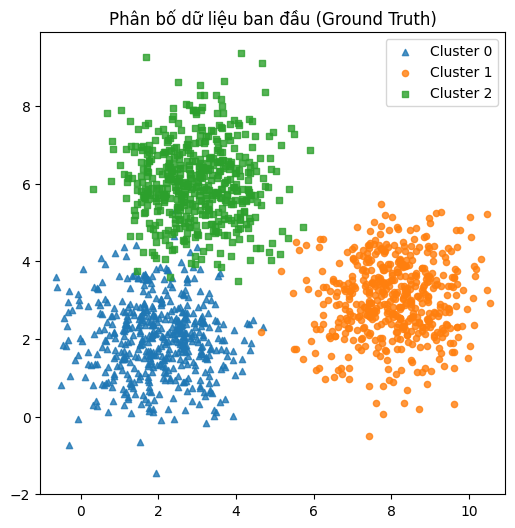

In [4]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Cố định seed để tái lập kết quả
np.random.seed(11)

# ====== TẠO DỮ LIỆU ======
def generate_clusters(centers, covariance, samples_per_cluster):
    data = []
    labels = []
    for idx, center in enumerate(centers):
        cluster_data = np.random.multivariate_normal(
            mean=center,
            cov=covariance,
            size=samples_per_cluster
        )
        data.append(cluster_data)
        labels.extend([idx] * samples_per_cluster)
    return np.vstack(data), np.array(labels)

# Tham số
cluster_centers = [[2, 2], [8, 3], [3, 6]]
cov_matrix = [[1, 0], [0, 1]]
num_samples = 500
K = 3

# Sinh dữ liệu
X, true_labels = generate_clusters(
    cluster_centers,
    cov_matrix,
    num_samples
)

# ====== HIỂN THỊ DỮ LIỆU ======
def visualize_clusters(data, labels):
    plt.figure(figsize=(6, 6))

    plt.scatter(
        data[labels == 0, 0], data[labels == 0, 1],
        marker='^', s=20, alpha=0.8, label='Cluster 0'
    )
    plt.scatter(
        data[labels == 1, 0], data[labels == 1, 1],
        marker='o', s=20, alpha=0.8, label='Cluster 1'
    )
    plt.scatter(
        data[labels == 2, 0], data[labels == 2, 1],
        marker='s', s=20, alpha=0.8, label='Cluster 2'
    )

    plt.axis('equal')
    plt.legend()
    plt.title("Phân bố dữ liệu ban đầu (Ground Truth)")
    plt.show()

print("Dữ liệu ban đầu:")
visualize_clusters(X, true_labels)


In [5]:
# Bước 4: Hàm khởi tạo các tâm cụm ban đầu
def kmeans_init_centers(X, n_cluster):
    # Chọn ngẫu nhiên k dòng từ X làm tâm cụm ban đầu
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

# Bước 5: Hàm xác định nhãn cho các điểm dữ liệu (Tìm tâm gần nhất)
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    # Trả về index của tâm gần nhất
    return np.argmin(D, axis = 1)

# Bước 6: Hàm cập nhật lại vị trí các tâm cụm
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        # Lấy tất cả các điểm thuộc cụm k
        Xk = X[labels == k, :]
        # Tính trung bình cộng để ra tâm mới
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# Bước 7: Hàm kiểm tra tính hội tụ (Tâm không đổi)
def kmeans_has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

# Hàm vẽ quá trình training
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i]
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i))
        plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i))
    plt.legend()
    plt.show()

=== BẮT ĐẦU CHẠY THUẬT TOÁN K-MEANS ===
Tâm cụm khởi tạo:
 [[1.95180248 6.72897643]
 [1.9444814  3.06716532]
 [3.42144011 0.17309469]]


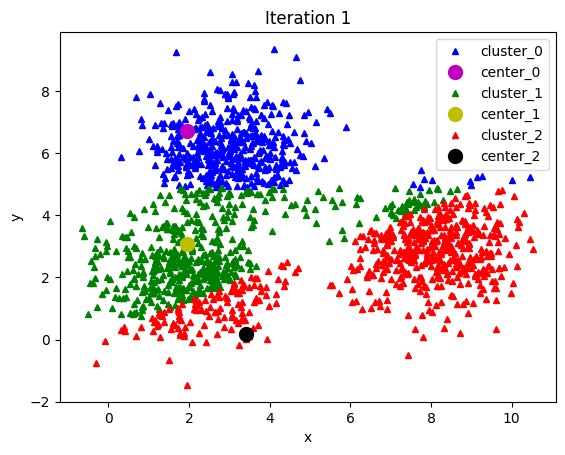

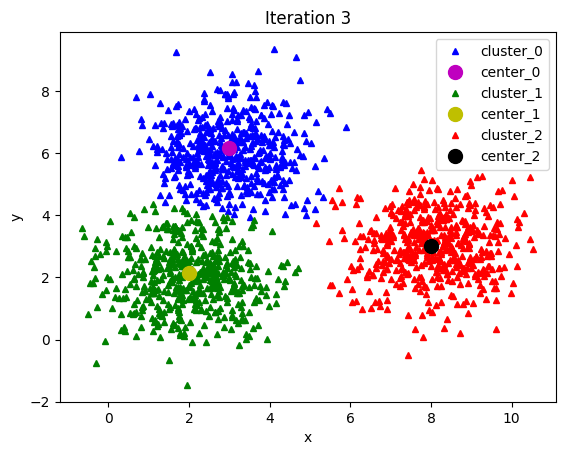

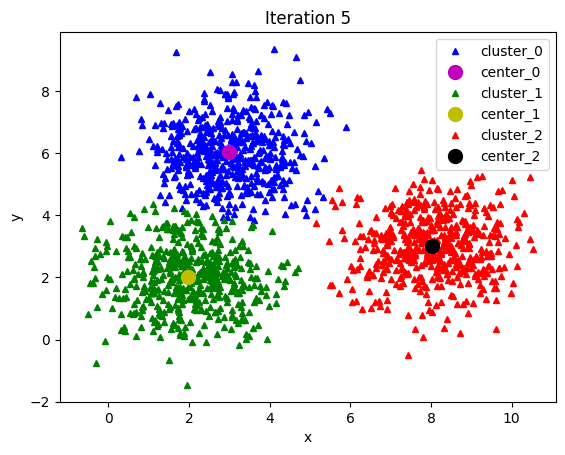

Hoàn tất! Thuật toán hội tụ sau 5 vòng lặp
Tâm cụm cuối cùng:
 [[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


In [7]:
# ====== BƯỚC 9: HÀM CHÍNH K-MEANS ======
def run_kmeans(data, k, init_centers, max_iter=100):
    centers = init_centers.copy()
    labels = np.zeros(data.shape[0], dtype=int)
    iteration = 0

    while iteration < max_iter:
        # Gán nhãn cho các điểm dữ liệu
        labels = kmeans_predict_labels(data, centers)

        # Minh họa quá trình (vẽ cách vòng lặp)
        if iteration % 2 == 0:
            kmeans_visualize(
                data,
                centers,
                labels,
                k,
                title=f"Iteration {iteration + 1}"
            )

        # Cập nhật lại tâm cụm
        updated_centers = kmeans_update_centers(data, labels, k)

        # Kiểm tra điều kiện dừng
        if kmeans_has_converged(centers, updated_centers):
            break

        centers = updated_centers
        iteration += 1

    return centers, labels, iteration


# ====== THỰC THI THUẬT TOÁN ======
print("=== BẮT ĐẦU CHẠY THUẬT TOÁN K-MEANS ===")

initial_centers = kmeans_init_centers(X, K)
print("Tâm cụm khởi tạo:\n", initial_centers)

final_centers, final_labels, num_iters = run_kmeans(
    data=X,
    k=K,
    init_centers=initial_centers
)

print("Hoàn tất! Thuật toán hội tụ sau", num_iters, "vòng lặp")
print("Tâm cụm cuối cùng:\n", final_centers)


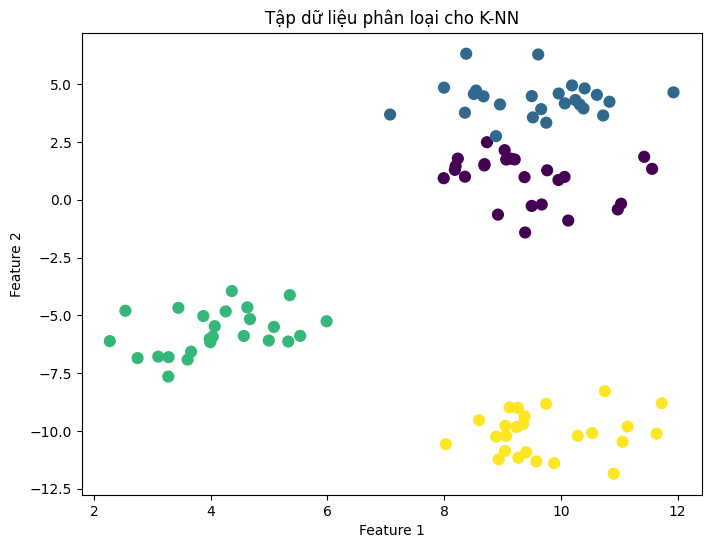

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# ====== BƯỚC 1: SINH DỮ LIỆU ======
num_samples = 100
num_features = 2
num_classes = 4

features, labels = make_blobs(
    n_samples=num_samples,
    n_features=num_features,
    centers=num_classes,
    cluster_std=1.0,
    random_state=4
)

# ====== BƯỚC 2: TRỰC QUAN HÓA DỮ LIỆU ======
plt.figure(figsize=(8, 6))
plt.scatter(
    features[:, 0],
    features[:, 1],
    c=labels,
    s=60,
    marker='o'
)
plt.title("Tập dữ liệu phân loại cho K-NN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# ====== BƯỚC 3: CHIA TRAIN / TEST ======
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.25,
    random_state=0,
    shuffle=True
)


In [11]:
def knn_from_scratch(X_train, X_query, y_train, k):
    num_query = X_query.shape[0]
    num_train = X_train.shape[0]

    # Ma trận lưu khoảng cách
    dist_matrix = np.zeros((num_query, num_train))

    # Tính khoảng cách Euclidean
    for i in range(num_query):
        for j in range(num_train):
            diff = X_query[i] - X_train[j]
            dist_matrix[i, j] = np.sqrt(np.sum(diff ** 2))

    predictions = []

    # Dự đoán cho từng điểm cần phân loại
    for i in range(num_query):
        # Ghép (distance, label)
        pairs = list(zip(dist_matrix[i], y_train))

        # Sắp xếp theo khoảng cách tăng dần
        pairs.sort(key=lambda x: x[0])

        # Lấy k láng giềng gần nhất
        nearest_neighbors = pairs[:k]

        # Bỏ phiếu
        vote_count = {}
        for _, lbl in nearest_neighbors:
            lbl = int(lbl)
            vote_count[lbl] = vote_count.get(lbl, 0) + 1

        # Chọn lớp có số phiếu cao nhất
        predicted_class = max(vote_count, key=vote_count.get)
        predictions.append(predicted_class)

    return np.array(predictions)


# ====== KIỂM THỬ HÀM TỰ VIẾT ======
sample_point = np.array([[1, 3]])
print(f"Dự đoán cho điểm {sample_point} với k = 3:")

manual_pred = knn_from_scratch(X_train, sample_point, y_train, k=3)
print("Lớp dự đoán:", manual_pred)


Dự đoán cho điểm [[1 3]] với k = 3:
Lớp dự đoán: [0]
